<a href="https://colab.research.google.com/github/kanagapriya3/deep-learning-projects/blob/main/Lung_cancer_prediction_project_ML_and_artificial_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TITLE : LUNG CANCER PREDICTION USING NEURAL NETWORKS ----S.K.KANAGAPRIYA

ALGORITHM: NEURAL NETWORKS.

In [ ]:
#IMPORT THE DEPENDECIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#data collection and processing
#loading the data from the sklearn
lung_data=pd.read_csv('/content/lung cancer dataset.csv')

In [ ]:
#print first 5 rowsin the dataset
lung_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
#print last 5 rows ofthe dataset
lung_data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [ ]:
lung_data.shape

(309, 16)

In [ ]:
#getting some information about the data
lung_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
#checking for missing values
lung_data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
lung_data["GENDER"].unique()

array(['M', 'F'], dtype=object)

In [ ]:
lung_data["GENDER"].value_counts()

M    162
F    147
Name: GENDER, dtype: int64

In [ ]:
lung_data["LUNG_CANCER"].unique()

array(['YES', 'NO'], dtype=object)

In [ ]:
lung_data["LUNG_CANCER"].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

In [ ]:
from sklearn import preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#label encoding converting categorical data into mumeric forms

le=preprocessing.LabelEncoder()
lung_data['GENDER']=le.fit_transform(lung_data['GENDER'])

lung_data['LUNG_CANCER']=le.fit_transform(lung_data['LUNG_CANCER'])

In [ ]:
lung_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


GENDER      : MALE  -1,  FEMALE- 0

LUNG CANCER : YES -1,    NO -0

In [ ]:
#statistical measure about the data
lung_data.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


DATASETS IN ALL COLUMNS: NO --1, YES ---2
eg:  smoking : yes -2 ,  no -1

array([[<Axes: title={'center': 'GENDER'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'SMOKING'}>,
        <Axes: title={'center': 'YELLOW_FINGERS'}>],
       [<Axes: title={'center': 'ANXIETY'}>,
        <Axes: title={'center': 'PEER_PRESSURE'}>,
        <Axes: title={'center': 'CHRONIC DISEASE'}>,
        <Axes: title={'center': 'FATIGUE '}>],
       [<Axes: title={'center': 'ALLERGY '}>,
        <Axes: title={'center': 'WHEEZING'}>,
        <Axes: title={'center': 'ALCOHOL CONSUMING'}>,
        <Axes: title={'center': 'COUGHING'}>],
       [<Axes: title={'center': 'SHORTNESS OF BREATH'}>,
        <Axes: title={'center': 'SWALLOWING DIFFICULTY'}>,
        <Axes: title={'center': 'CHEST PAIN'}>,
        <Axes: title={'center': 'LUNG_CANCER'}>]], dtype=object)

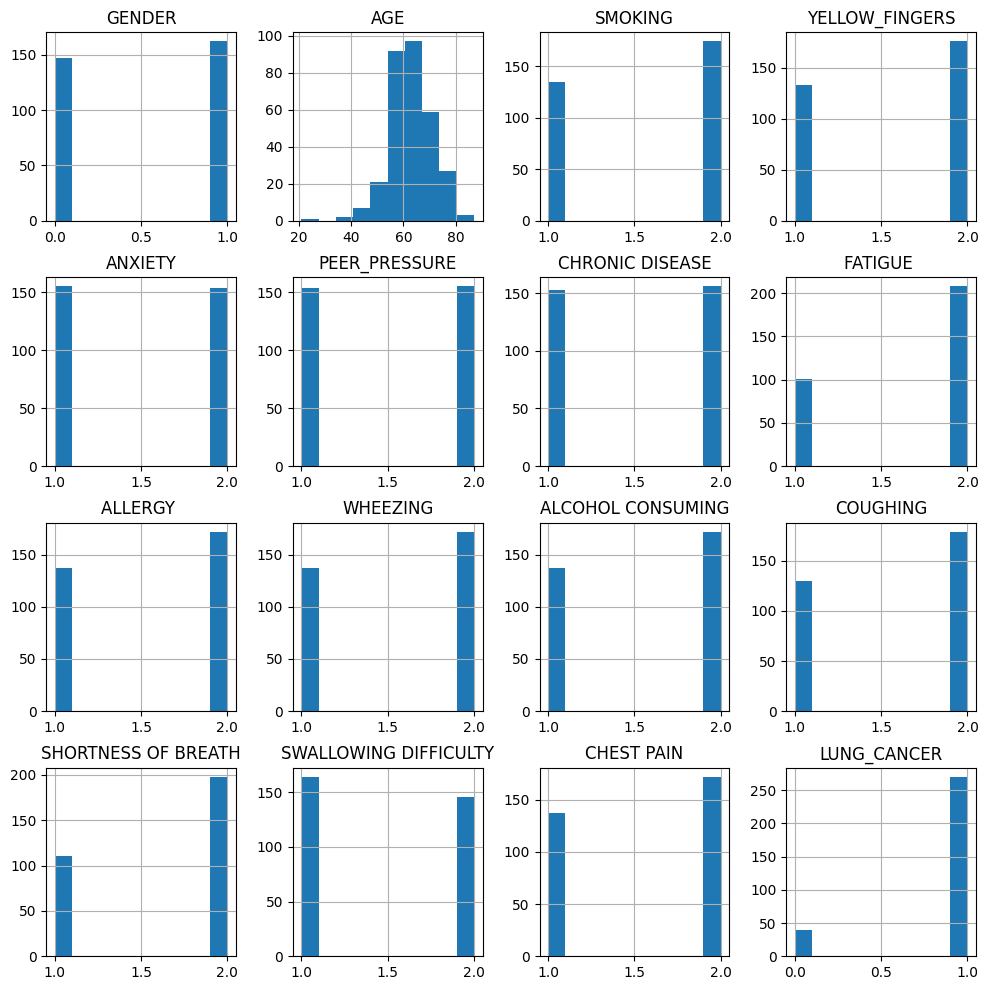

In [ ]:
#plot histograms for each variable
lung_data.hist(figsize = (12,12))

In [ ]:
plt.show()

In [ ]:
import seaborn as sns

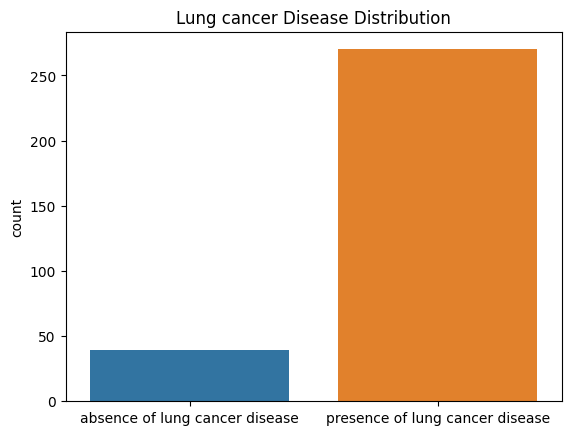

In [ ]:
f = sns.countplot(x='LUNG_CANCER',data=lung_data)
f.set_title("Lung cancer Disease Distribution")
f.set_xticklabels(['absence of lung cancer disease','presence of lung cancer disease'])
plt.xlabel("");

In [ ]:
lung_data['LUNG_CANCER'].value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

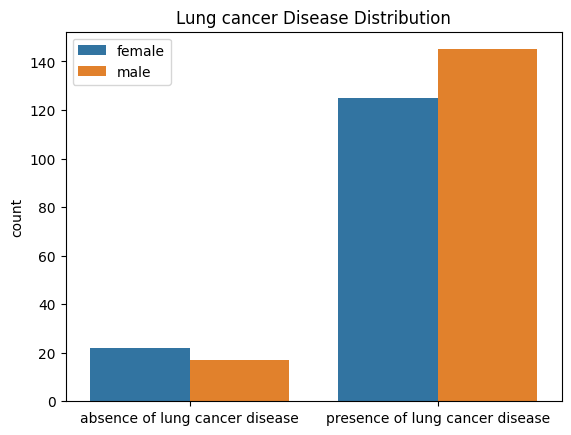

In [ ]:
f = sns.countplot(x='LUNG_CANCER',data=lung_data, hue = 'GENDER')
plt.legend(['female','male'])
f.set_title("Lung cancer Disease Distribution")
f.set_xticklabels(['absence of lung cancer disease','presence of lung cancer disease'])
plt.xlabel("");

In [ ]:
# function for plotting
def plot(col, lung_data=lung_data):
    return lung_data.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='GENDER'>

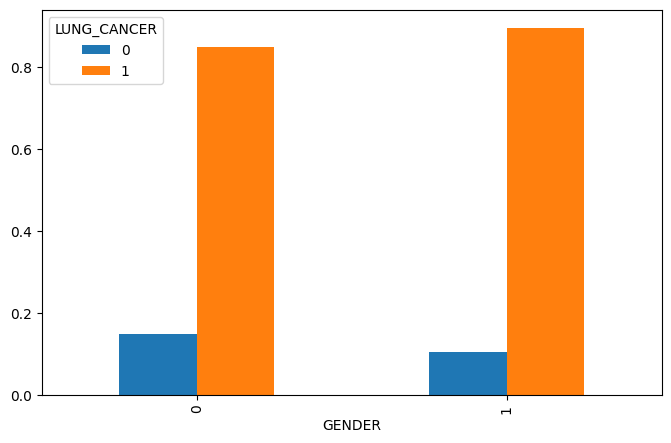

In [ ]:
plot('GENDER')

<Axes: xlabel='AGE'>

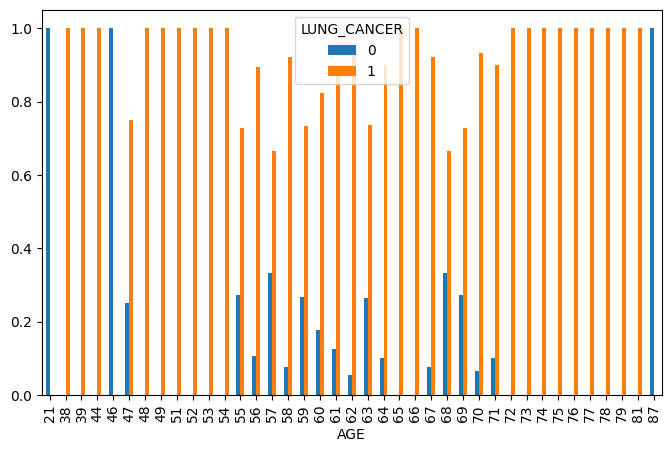

In [ ]:
plot('AGE')

<Axes: xlabel='SMOKING'>

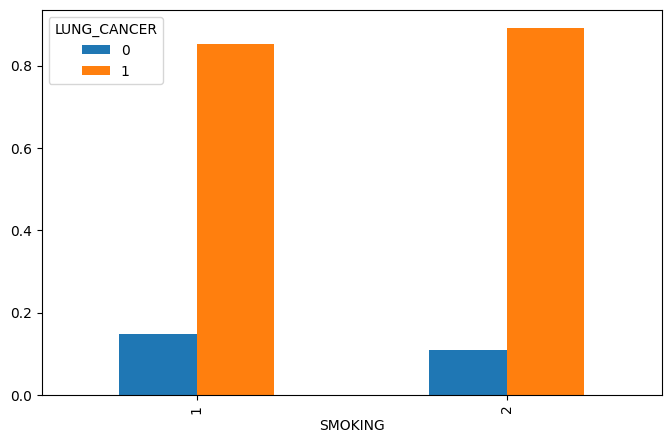

In [ ]:
plot('SMOKING')

<Axes: xlabel='YELLOW_FINGERS'>

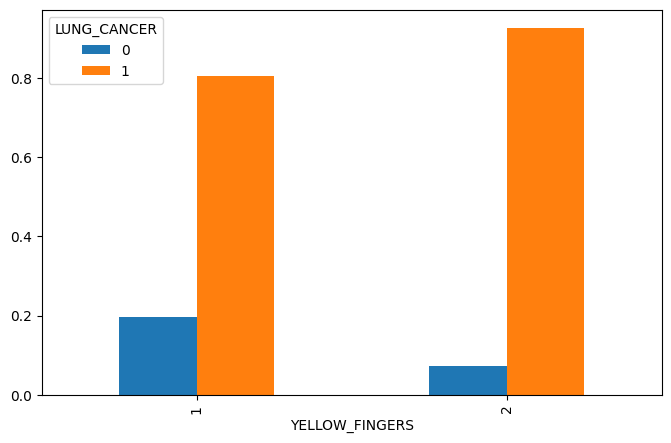

In [ ]:
plot('YELLOW_FINGERS')

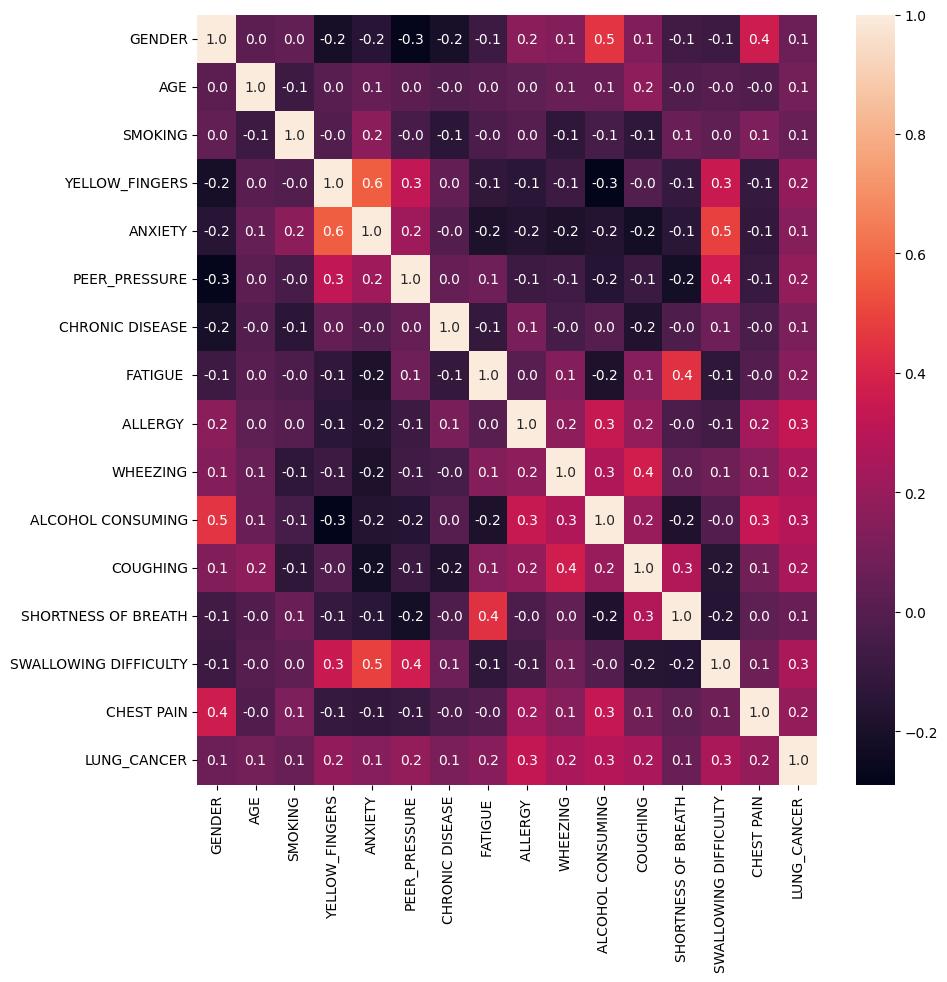

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(lung_data.corr(),annot=True,fmt='.1f')
plt.show()

In [ ]:
#checking the distributions of target variable
lung_data['LUNG_CANCER'].value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

1 represents person has Presence of Lung cancer disease

0 represents person has Absence of Lung cancer disease

In [ ]:
#grouping all the point with lung cancer 1 and 0
lung_data.groupby('LUNG_CANCER').mean()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
LUNG_CANCER,,,,,,,,,,,,,,,
0,0.435897,60.743590,1.487179,1.333333,1.307692,1.256410,1.358974,1.487179,1.128205,1.230769,1.179487,1.256410,1.564103,1.128205,1.307692
1,0.537037,62.951852,1.574074,1.603704,1.525926,1.537037,1.525926,1.700000,1.618519,1.603704,1.611111,1.625926,1.651852,1.518519,1.592593


In [ ]:
#seperating the features and target
x=lung_data.drop(columns='LUNG_CANCER',axis=1)
y=lung_data['LUNG_CANCER']

In [ ]:
print (x)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         0   59        1               1        1              2   
3         1   63        2               2        2              1   
4         0   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       0   56        1               1        1              2   
305       1   70        2               1        1              1   
306       1   58        2               1        1              1   
307       1   67        2               1        2              1   
308       1   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2     

1 represents person has Presence of Lung cancer disease

0 represents person has Absence of Lung cancer disease

In [ ]:
print (y)


0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64


In [ ]:
from sklearn import model_selection

In [ ]:
#split the data into training data and testing data
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,stratify=y,test_size=0.25,random_state=0)
print(x.shape,x_train.shape,x_test.shape)

(309, 15) (231, 15) (78, 15)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

algorithm 1:- support vector machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()
svc_model.fit(x_train_std, y_train)

SVC()

In [ ]:
#model evaluation and accuracy score of svm
x_train_prediction = svc_model.predict(x_train_std)
accuracy = accuracy_score(x_train_prediction,y_train)

In [ ]:
print("Accuracy score of svm :",accuracy)

Accuracy score of svm : 0.961038961038961


In [ ]:
svc_model.predict(x_train_std)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
y_svc_pred = svc_model.predict(x_test_std)

In [ ]:
y_svc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [ ]:
#Model accuracy of svm classification report
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.93      0.97      0.95        68

    accuracy                           0.91        78
   macro avg       0.82      0.74      0.77        78
weighted avg       0.90      0.91      0.90        78



Algorithm 2: Logisic Regression model

In [ ]:
#Fitting training data to the model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(x_train_std, y_train)

LogisticRegression(random_state=0)

In [ ]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(x_test_std)
y_lr_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#linear regression classification report
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.92      0.99      0.95        68

    accuracy                           0.91        78
   macro avg       0.86      0.69      0.74        78
weighted avg       0.90      0.91      0.90        78



Alogrithm 3: XGBoost classifier

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train_std, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#Predicting result using testing data
y_xgb_pred= xgb_model.predict(x_test_std)
y_xgb_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
#Model accuracy and classification report of extreme gradient boosting algorithm
xgb_cr=classification_report(y_test, y_xgb_pred)
print(xgb_cr)

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.94      0.97      0.96        68

    accuracy                           0.92        78
   macro avg       0.85      0.79      0.81        78
weighted avg       0.92      0.92      0.92        78



Alogorithm 4 : Gradient descent boosting algorithm

In [ ]:
#Training
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
#Predicting result using testing data
y_gb_pred= gb_model.predict(x_test)
y_gb_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
#Model accuracy and classification report of gradient boosting
gb_cr=classification_report(y_test, y_gb_pred)
print(gb_cr)

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.93      0.97      0.95        68

    accuracy                           0.91        78
   macro avg       0.82      0.74      0.77        78
weighted avg       0.90      0.91      0.90        78



In [ ]:
# K-Fold Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)



In [ ]:
# Logistic regerssion model
lr_model_scores = cross_val_score(lr_model,x, y, cv=kf)

In [ ]:
print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))


Logistic regression models' average accuracy: 0.9192473118279569


In [ ]:
# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,x, y, cv=kf)

In [ ]:
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))

Support Vector Classifier models' average accuracy: 0.8740860215053763


In [ ]:
# XGBoost model
xgb_model_scores = cross_val_score(xgb_model,x, y, cv=kf)

In [ ]:
print("XGBoost models' average accuracy:", np.mean(xgb_model_scores))

XGBoost models' average accuracy: 0.8964516129032258


In [ ]:
# Gradient boost model
gb_model_scores = cross_val_score(gb_model,x, y, cv=kf)

In [ ]:
print("Gradient boost models' average accuracy:", np.mean(gb_model_scores))

Gradient boost models' average accuracy: 0.8933333333333333


Building and Training neural network

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#import tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

In [ ]:
#build the model for ANN
model = keras.Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train_std.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
 #Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the modeel
model.fit(x_train_std, y_train, batch_size=10, epochs=10,validation_data=(x_test_std, y_test) )


Epoch 1/10
24/24 [==============================] - 2s 14ms/step - loss: 0.4516 - accuracy: 0.8745 - val_loss: 0.3622 - val_accuracy: 0.8718
Epoch 2/10
24/24 [==============================] - 0s 4ms/step - loss: 0.3289 - accuracy: 0.8745 - val_loss: 0.3000 - val_accuracy: 0.8718
Epoch 3/10
24/24 [==============================] - 0s 4ms/step - loss: 0.2513 - accuracy: 0.8788 - val_loss: 0.2541 - val_accuracy: 0.8846
Epoch 4/10
24/24 [==============================] - 0s 3ms/step - loss: 0.1993 - accuracy: 0.8961 - val_loss: 0.2198 - val_accuracy: 0.9103
Epoch 5/10
24/24 [==============================] - 0s 4ms/step - loss: 0.1692 - accuracy: 0.9307 - val_loss: 0.2013 - val_accuracy: 0.9103
Epoch 6/10
24/24 [==============================] - 0s 3ms/step - loss: 0.1452 - accuracy: 0.9394 - val_loss: 0.1947 - val_accuracy: 0.9103
Epoch 7/10
24/24 [==============================] - 0s 4ms/step - loss: 0.1384 - accuracy: 0.9437 - val_loss: 0.2133 - val_accuracy: 0.9103
Epoch 8/10
24/24 [=

In [ ]:
#Evaluate the model
loss, accuracy = model.evaluate(x_train_std, y_train)
print("loss:",loss)
print("Accuracy:", accuracy)

8/8 [==============================] - 0s 2ms/step - loss: 0.0905 - accuracy: 0.9610
loss: 0.09052105993032455
Accuracy: 0.9610389471054077


In [ ]:
#Evaluate the model
loss, accuracy = model.evaluate(x_test_std, y_test)
print("loss:",loss)
print("Accuracy:", accuracy)

3/3 [==============================] - 0s 4ms/step - loss: 0.2441 - accuracy: 0.9103
loss: 0.24412907660007477
Accuracy: 0.9102563858032227


In [ ]:
y_model_pred = model.predict(x_test_std)
y_model_pred

3/3 [==============================] - 0s 3ms/step


array([[0.9995435 ],
       [0.99936736],
       [0.97747517],
       [0.99960345],
       [0.9986744 ],
       [0.99947655],
       [0.9996385 ],
       [0.9623632 ],
       [0.99264836],
       [0.99636227],
       [0.99943316],
       [0.9991633 ],
       [0.999991  ],
       [0.99990296],
       [0.9990899 ],
       [0.9985213 ],
       [0.92297363],
       [0.99942976],
       [0.49938628],
       [0.99843615],
       [0.41133538],
       [0.91726446],
       [0.9996656 ],
       [0.9941779 ],
       [0.9546382 ],
       [0.9982467 ],
       [0.99993294],
       [0.13371079],
       [0.99885845],
       [0.99834573],
       [0.67225885],
       [0.9885163 ],
       [0.9996611 ],
       [0.99988896],
       [0.9243498 ],
       [0.7783144 ],
       [0.9677777 ],
       [0.9998135 ],
       [0.99981153],
       [0.97113484],
       [0.9991878 ],
       [0.9728531 ],
       [0.19902289],
       [0.9993248 ],
       [0.45837244],
       [0.9999748 ],
       [0.9962868 ],
       [0.997

In [ ]:
#building the predictive system for ANN
input_data = (0,61,2,2,2,2,2,2,1,2,1,2,2,2,1)

#change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)


# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)


prediction = model.predict(input_data_std)
print(prediction)



if (prediction > 0.6):
  print('The Person have a lung Disease')
else:
   print('The Person does not have a lung Disease')


1/1 [==============================] - 0s 26ms/step
[[0.99988896]]
The Person have a lung Disease


In [ ]:
#building the predictive system for linear regression model
input_data = (0,61,1,1,1,1,2,2,1,1,1,1,2,1,1,)

#change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = lr_model.predict(input_data_std)
print(prediction)


if (prediction [0]== 0):
  print('The Person does not has a lung Disease')
else:
   print('The Person have a lung Disease')

[0]
The Person does not has a lung Disease
